In [1]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
#import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

In [3]:
# Generate summary statistics
df_market_data.describe()

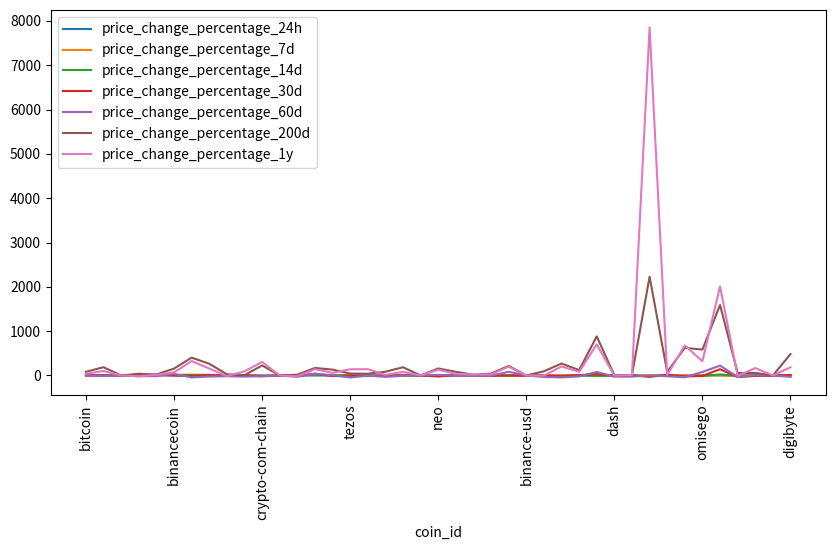

In [4]:
import matplotlib.pyplot as plt
df_market_data.plot.line(figsize=(10, 5), rot=90)
plt.show()

---

### Prepare the Data

In [5]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
scaler.fit(df_market_data)

# Scale the data
df_market_data_scaled = scaler.transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
df_market_data_scaled_df = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns)

# Copy the crypto names from the original data
df_market_data_scaled_df['coin_id'] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled_df.set_index('coin_id', inplace=True)

# Display sample data
df_market_data_scaled_df.head()

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [8]:
from sklearn.cluster import KMeans

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k)

    # 2. Fit the model to the data using `df_market_data_scaled_df`
    kmeans_model.fit(df_market_data_scaled_df)

    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_1 = pd.DataFrame(elbow_data)

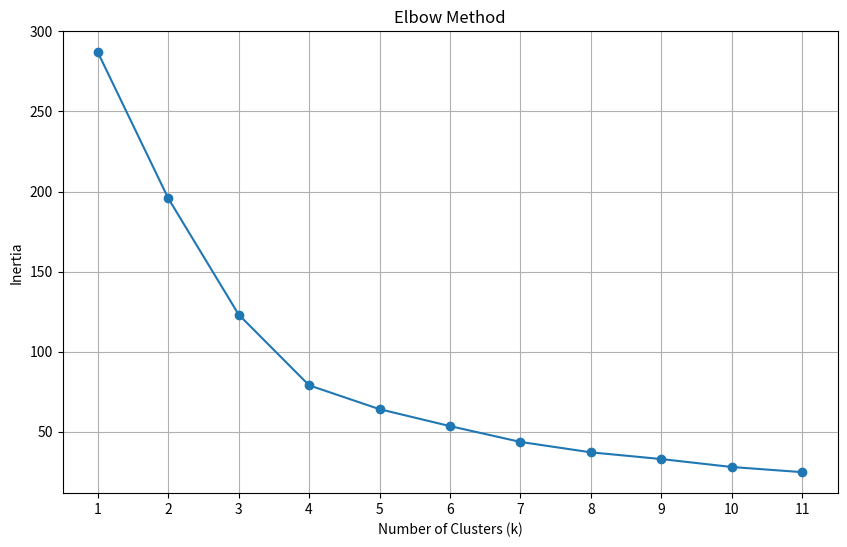

In [10]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(elbow_df_1['k'], elbow_df_1['inertia'], marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df_1['k'])
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
from sklearn.cluster import KMeans

# Best value for K is 4
k = 4

# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=k)

In [12]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_scaled_df)

KMeans(n_clusters=4) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. KMeans KMeans(n_clusters=4)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_market_data_scaled_df)

# Print the resulting array of cluster values
print("Cluster Labels:", cluster_labels)

Cluster Labels: [3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 1 3 0 0 2
 0 0 0 0]


In [14]:
# Create a copy of the DataFrame
df_with_clusters = df_market_data_scaled_df.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
df_with_clusters['labels'] = cluster_labels

# Display sample data
df_with_clusters.sample(5)

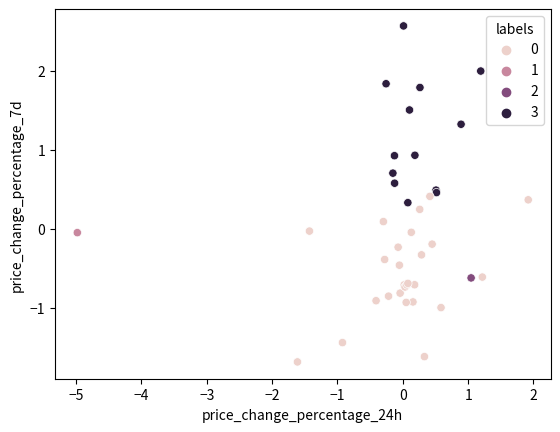

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot using seaborn
sns.scatterplot(x="price_change_percentage_24h", y="price_change_percentage_7d", hue="labels", data=df_with_clusters)
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
from sklearn.decomposition import PCA

# Create a PCA model instance and set n_components=3
pca_model = PCA(n_components=3)

In [18]:
# Use the PCA model with fit_transform to reduce to three principal components
pca_data = pca_model.fit_transform(df_with_clusters.drop(columns=['labels']))

# Create a DataFrame with the PCA data
df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame
df_pca.head()

In [19]:
# Retrieve the explained variance
explained_variance = pca_model.explained_variance_ratio_

# Print the explained variance for each principal component
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

In [ ]:
# Get the components from the fitted PCA model
components = pca_model.components_

# Create a DataFrame for better visualization
components_df = pd.DataFrame(components, columns=df_with_clusters.drop(columns=['labels']).columns, index=[f'PC{i+1}' for i in range(components.shape[0])])

print(components_df)


     price_change_percentage_24h  price_change_percentage_7d  \
PC1                    -0.416728                   -0.102432   
PC2                     0.358162                    0.227432   
PC3                    -0.218795                    0.787670   

     price_change_percentage_14d  price_change_percentage_30d  \
PC1                    -0.009162                     0.191523   
PC2                     0.540415                     0.562182   
PC3                     0.349534                    -0.181744   

     price_change_percentage_60d  price_change_percentage_200d  \
PC1                     0.320365                      0.594468   
PC2                     0.434040                      0.027735   
PC3                    -0.361377                      0.039733   

     price_change_percentage_1y  
PC1                    0.568379  
PC2                   -0.150789  
PC3                    0.210541  


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.89

In [20]:
# Create a new DataFrame with the PCA data
df_pca_final = df_pca.copy()

# Copy the crypto names from the original data (using the index values)
df_pca_final['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_pca_final.set_index('coin_id', inplace=True)

# Display sample data
df_pca_final.sample(5)

---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [22]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k)
# 2. Fit the model to the data using `df_market_data_pca`
    kmeans_model.fit(df_pca_final)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df_2 = pd.DataFrame(elbow_data)

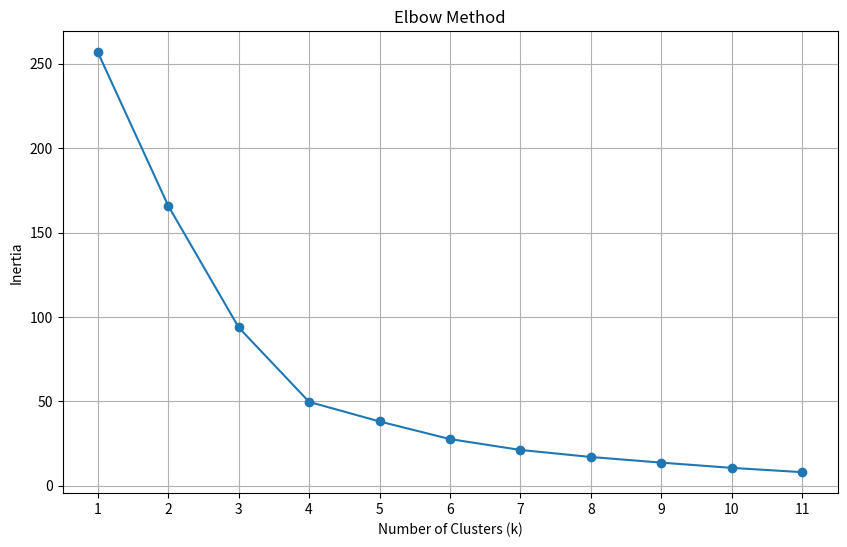

In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df_2['k'], elbow_df_2['inertia'], marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df_2['k'])
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not differ from original data

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
k = 4
kmeans_model = KMeans(n_clusters=k)

In [26]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca_final)

KMeans(n_clusters=4) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. KMeans KMeans(n_clusters=4)

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = kmeans_model.predict(df_pca_final)

# Print the resulting array of cluster values.
print("Cluster Labels:", cluster_labels)

Cluster Labels: [3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [28]:
# Create a copy of the DataFrame with the PCA data
df_with_clusters_2 = df_pca_final.copy()

# Add a new column to the DataFrame with the predicted clusters
df_with_clusters_2['labels'] = cluster_labels


# Display sample data
df_with_clusters_2.sample(5)

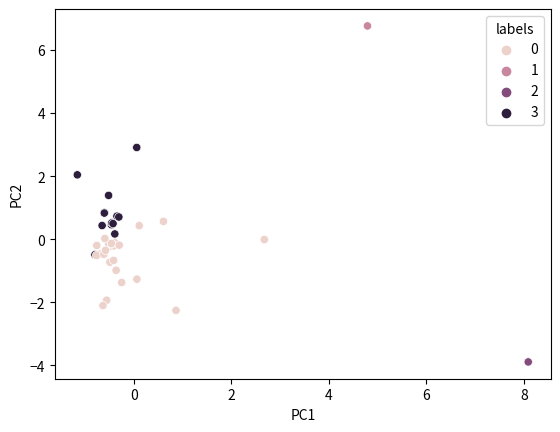

In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
sns.scatterplot(x="PC1", y="PC2", hue="labels", data=df_with_clusters_2)
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

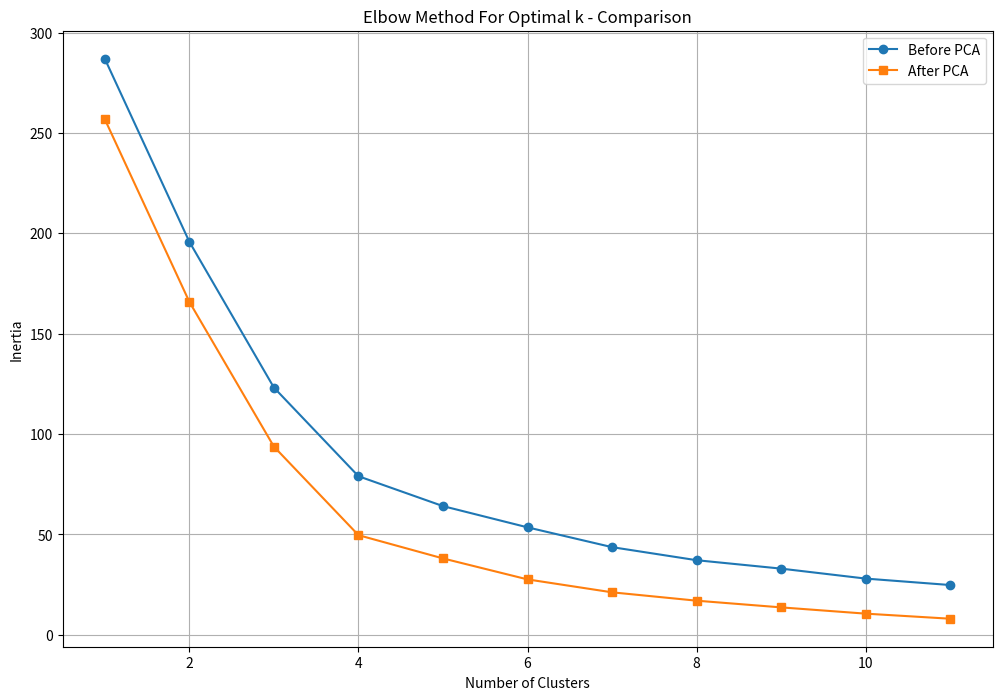

In [30]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(12, 8))

# Option 1: Change the range of x-values to match the y-values
plt.plot(range(1, 12), elbow_df_1.iloc[:, 1], label='Before PCA', marker='o')
plt.plot(range(1, 12), elbow_df_2.iloc[:, 1], label='After PCA', marker='s')

# Option 2: Use only the first column from the DataFrames
# plt.plot(range(1, 11), elbow_df_1.iloc[:, 0], label='Before PCA', marker='o')
# plt.plot(range(1, 11), elbow_df_2.iloc[:, 0], label='After PCA', marker='s')

plt.title('Elbow Method For Optimal k - Comparison')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_with_clusters

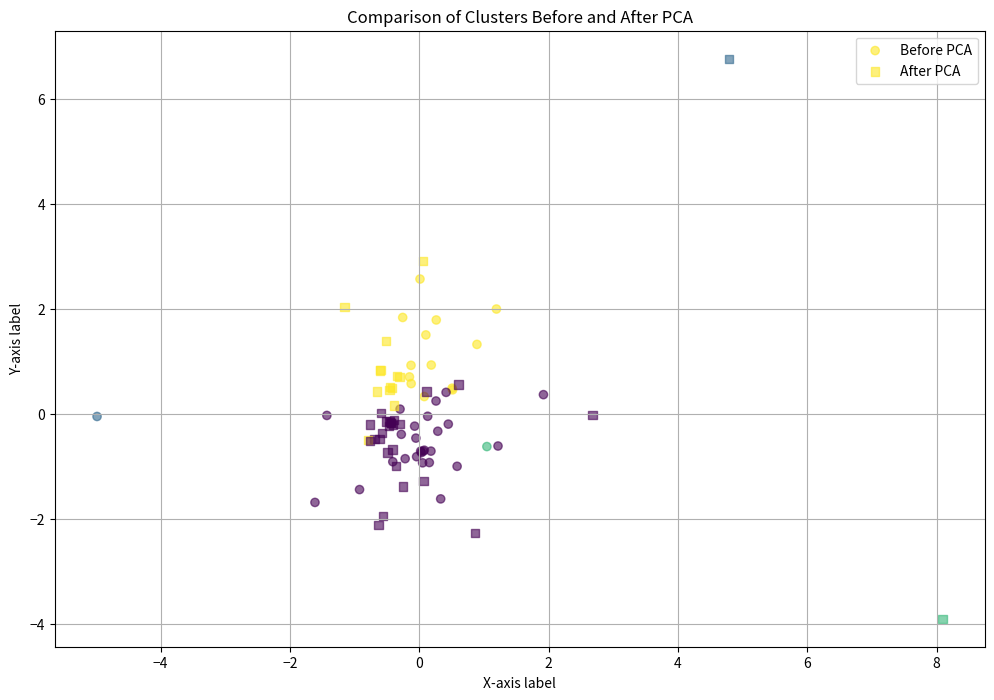

In [31]:
# Composite plot to contrast the clusters
# Create a composite plot to contrast the clusters
plt.figure(figsize=(12, 8))

# Scatter plot for df_with_clusters
plt.scatter(df_with_clusters['price_change_percentage_24h'], df_with_clusters['price_change_percentage_7d'], c=df_with_clusters['labels'], label='Before PCA', marker='o', alpha=0.6)

# Scatter plot for df_with_clusters_2
plt.scatter(df_with_clusters_2['PC1'], df_with_clusters_2['PC2'], c=df_with_clusters_2['labels'], label='After PCA', marker='s', alpha=0.6)

plt.title('Comparison of Clusters Before and After PCA')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.legend()
plt.grid(True)
plt.show()
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** I do not know why it differs. I expected to have a very similar output but I did not.

In [ ]:
# Display the first few rows of the original DataFrame to identify the correct column name for the crypto names
df_market_data.head()